# Pandas, data frames and making nice figures with Seaborn (and Matplotlib)
[the official homepage](https://pandas.pydata.org)

## Basic data structures - start with Series then build up to DataFrames

[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)

* A **Series** is a 1D array that can hold any type of data (numeric types, non-numeric, Python objects and so forth).
    * Unlike a 1D numpy array, each entry is **labeled** with an index that is used to keep track of what each entry is, and can be used to lookup the value corresponding to each index during analysis.
    * These labels are fixed - they will always index the same value unless you explicitly break that link.
    * The list of labels that forms the index can either be declared upon series creation or, by default, it will range from 0 to len(data)-1.
        * If you're going to use Pandas to organize your data, specifying usable and informative labels is a good idea!
        
<div class="alert alert-warning">
Pandas will allow you to specify non-unique labels. This can be fine for operations that don't rely on idnexing by label. However, operations that do rely on unique labels for indexing may through an unexpected error so its good general practice to use unique labels!
</div>

## import libs

In [1]:
import numpy as np
import matplotlib as plt

# import a generic pandas object and also a few specific functions
import pandas as pd 
from pandas import DataFrame, read_csv

# new - get current path for file i/o later on in tutorial
import os
cwd = os.getcwd()

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## Create a series from an numpy ndarray

['Sub0', 'Sub1', 'Sub2', 'Sub3', 'Sub4', 'Sub5', 'Sub6', 'Sub7', 'Sub8', 'Sub9', 'Sub10', 'Sub11', 'Sub12', 'Sub13', 'Sub14', 'Sub15', 'Sub16', 'Sub17', 'Sub18', 'Sub19']


AttributeError: module 'matplotlib' has no attribute 'show'

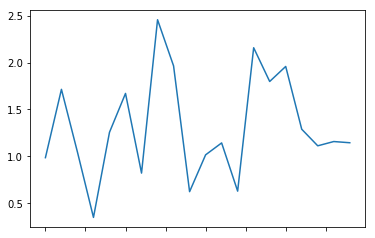

In [11]:
# make some data and then use pd.Series

# random seed so we get the same thing each time 
np.random.RandomState(0)

# For this simulation, lets have 20 subjects, and some data
# generated from a Rayleigh distribution 
# (no particular motivation for selecting this distribution, just for something different)
N = 20
data = np.random.rayleigh(scale=1, size=N)

# make a list of subject names for use as an index labels
var_name = 'Sub'
index=[]
for n in np.arange(N):
    index.append(var_name+str(n))

print(index)

# then make our series by passing in data and our index labels
np_to_s = pd.Series(data, index=index)
np_to_s.plot()
plt.show()

## DataFrames

* 
* 
* 


## Make a data set that we can play with, will import some real data later on
* just make up some stuff here...lets say responses in 5 different neurons to different stimuli 

In [ ]:
# seed random number generator
np.random.RandomState(0)

# dependent variables - 5 neurons...
neurons = ['Nrn1','Nrn2','Nrn3','Nrn4','Nrn5','Nrn6','Nrn7','Nrn8','Nrn9','Nrn10']  

# independent variables...responses in Hz to two stimulus conditions
resp1_hz = [14, 27, 62, 88, 45, 56, 75, 63, 33, 46]

# set up our response to stimulus 2...use random.randint for fun
min_resp = 1  # inclusive
max_resp = 90 # exclusive
resp2_hz = np.random.randint(1, 90, len(resp1_hz))

## New - use 'zip' function to wrap up the data from each list into one list
* does like it sounds like it does - takes three iterators and groups them together into a single iterator with the 1st element in each iterator together, then the second, etc. 
* length of resulting iterator limited by the length of the shortest input iterator

[reference](https://www.w3schools.com/python/ref_func_zip.asp)

In [ ]:
neuron_data = list(zip(neurons, resp1_hz, resp2_hz))
print(neuron_data)

## Make a dataframe object to hold the contents of the data set

In [ ]:
df = pd.DataFrame(data = neuron_data, columns = ['neuron', 'resp1', 'resp2'])

# take a look at the nice output here...
df

## Saving data in a csv file

In [ ]:
 # lets save our header as well so that it doesn't think our first row is the header when we read the file back in
df.to_csv('spike_rates.csv',index=False,header=True)

In [ ]:
# use our current working directory to build a path to the file
print(cwd)
file_name = cwd + '/spike_rates.csv'
print(file_name)

df = pd.read_csv(file_name)
df

## Get a high-level summary of the data

In [ ]:
df.describe()

## Can also apply a set of more targeted analyses using the df object

* [Pandas doc for all functions](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)

In [ ]:
df.mean(axis=0)